# Introduction
The aim of the experiment was to see how soaking temperature affected the length increase in beans (*Phaseolus vulgaris*) when they were soaked in water for 12 hours. The two temperatures used for soaking were room temperature and refrigerator temperature.

# Materials Methods 
The experiment was performed by allocating 30 dry beans at random to each temperature treatment conditional on the constraint that we have equal numbers of short, medium and long beans in each temperature treatment. The beans were labelled in order to keep track of the beans. The cold’s treatment water was chilled before the beans were immersed. After the beans were soaked for 12 hours, each bean’s-soaked length was recorded. The data was recorded in an excel sheet.

The statistical analyses used to analyze the results was independent sample t test. This test investigates whether there is a significant difference in the means of two independent groups. The two temperature treatments are independent thus the justification to use this type of test. Before the test was conducted the assumptions, which were investigated included the assumption of normality and the assumption of constant variance. The Q-Q plot, Anderson-Darling test and the Shapiro-Wilks test was used to test for normality, Box plot was used to test for the presence of outliers in the data. The Levene’s and Bartlett's test was used to detect the presence of heteroscedasticity in the data.

# Results 

In [2]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import researchpy as rp
from scipy import stats
from sklearn.preprocessing import scale
import seaborn as sns 

In [3]:
# read data 
df = pd.read_excel('Bean_Soak_Off_Spring_2021.xlsx')

In [4]:
df.head() 

,Temperature,Bean,Dry,Soaked
0,1,1,1.410,1.86
1,1,2,1.415,1.82
2,1,3,1.165,1.48
3,1,4,1.350,1.72
4,1,5,1.455,1.87


In [5]:
# create difference column 
df['Difference'] = df['Soaked'] - df['Dry']
df.head() 

,Temperature,Bean,Dry,Soaked,Difference
0,1,1,1.410,1.86,0.450
1,1,2,1.415,1.82,0.405
2,1,3,1.165,1.48,0.315
3,1,4,1.350,1.72,0.370
4,1,5,1.455,1.87,0.415


In [12]:
# replace temparature 
df['Temperature'].replace({1: "Room temperature", 2: "Chilled temperature"}, inplace=True)
df.head()

,Temperature,Bean,Dry,Soaked,Difference
0,Room temperature,1,1.410,1.86,0.450
1,Room temperature,2,1.415,1.82,0.405
2,Room temperature,3,1.165,1.48,0.315
3,Room temperature,4,1.350,1.72,0.370
4,Room temperature,5,1.455,1.87,0.415


In [72]:
df.describe() 

,Bean,Dry,Soaked,Difference
count,60.000000,60.000000,60.000000,60.000000
mean,15.500000,1.440583,1.601583,0.161000
std,8.728484,0.117055,0.231958,0.246153
min,1.000000,1.165000,1.100000,-0.300000
25%,8.000000,1.380000,1.400000,-0.150000
50%,15.500000,1.420000,1.650000,0.280000
75%,23.000000,1.496250,1.785000,0.370000
max,30.000000,1.800000,2.210000,0.490000


In [13]:
# for room tempareture 
df1 = df[df['Temperature'] == 'Room temperature']
df1.head()

,Temperature,Bean,Dry,Soaked,Difference
0,Room temperature,1,1.410,1.86,0.450
1,Room temperature,2,1.415,1.82,0.405
2,Room temperature,3,1.165,1.48,0.315
3,Room temperature,4,1.350,1.72,0.370
4,Room temperature,5,1.455,1.87,0.415


In [8]:
df1.shape 

(30, 5)

In [9]:
# for chilled tempareture 
df2 = df[df['Temperature'] == 'Chilled temperature']
df2.head()

,Temperature,Bean,Dry,Soaked,Difference
30,Chilled temperature,1,1.430,1.755,0.325
31,Chilled temperature,2,1.345,1.470,0.125
32,Chilled temperature,3,1.495,1.640,0.145
33,Chilled temperature,4,1.440,1.800,0.360
34,Chilled temperature,5,1.380,1.660,0.280


In [10]:
df2.shape

(30, 5)

In [27]:
# summary statistics for room temperature 
df1.describe() 

,Bean,Dry,Soaked,Difference
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,1.423833,1.627833,0.204000
std,8.803408,0.125112,0.274448,0.261235
min,1.000000,1.165000,1.100000,-0.200000
25%,8.250000,1.350000,1.412500,-0.100000
50%,15.500000,1.420000,1.717500,0.370000
75%,22.750000,1.450000,1.820000,0.390000
max,30.000000,1.750000,2.210000,0.490000


In [11]:
# summary statistics for chilled temperature 
df2.describe() 

,Bean,Dry,Soaked,Difference
count,30.000000,30.000000,30.000000,30.00000
mean,15.500000,1.457333,1.575333,0.11800
std,8.803408,0.107901,0.180879,0.22628
min,1.000000,1.285000,1.200000,-0.30000
25%,8.250000,1.396250,1.400000,-0.15000
50%,15.500000,1.425000,1.617500,0.17750
75%,22.750000,1.500000,1.703750,0.31000
max,30.000000,1.800000,1.840000,0.37000


## Normality Assumptions 

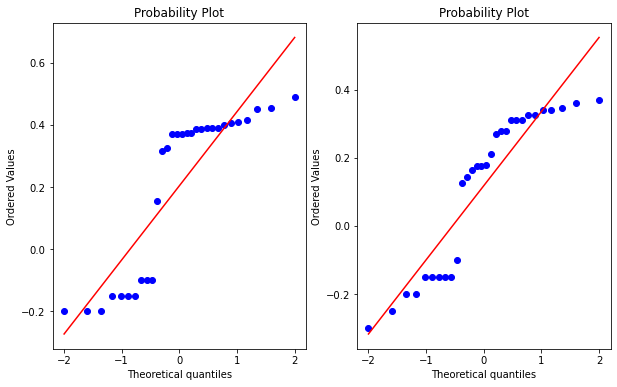

In [35]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
stats.probplot(df1['Difference'], plot=plt, dist='norm')
plt.subplot(122)
stats.probplot(df2['Difference'], plot=plt, dist='norm')
plt.show() 

The majority of the observations for both treatments do not fall approximately along the reference line, indicating that the observations are not normally distributed, according to the QQ map. The Anderson-Darling and Shapiro-Wilks tests also endorse this conclusion. The p-value should be greater than 0.05 if the data is normally distributed.

## Test for Normality
- $H_0$: The data follow Normal Distribution
- $H_a$: The data don't follow Normal Distribution

In [69]:
# shapirio
stat, p = stats.shapiro(df1['Difference'])
print("{:.8f}".format(stat), "{:.8f}".format(p))
alpha = 0.05
if p > alpha: 
    print("The data follow Normal Distribution")
else: 
    print("The data don't follow Normal Distribution")

0.75319356 0.00001026
The data don't follow Normal Distribution


In [71]:
# shapirio
stat, p = stats.shapiro(df2['Difference'])
print("{:.8f}".format(stat), "{:.8f}".format(p))
alpha = 0.05 
if p > alpha: 
    print("The data follow Normal Distribution")
else: 
    print("The data don't follow Normal Distribution")

0.84113020 0.00040656
The data don't follow Normal Distribution


### Comment 
From table2, hence all the p value is less than 0.05 for each treatment, we have enough evidence to reject null hypothesis, which indicates that the normality assumption is violated. The conclusion from QQ plot is supported by the both Anderson-Darling and Shapiro-Wilk test.

In [37]:
stat, p = stats.ttest_ind(df1['Difference'], df2['Difference'])
print(stat, p)
alpha = 0.05 
if p > alpha: 
    print("The soack lenght are not significantly different.")
else: 
    print("The soack length are significantly different.")

1.3629259804422171 0.17817404901891506
The soack lenght are not significantly different.


In [42]:
stat, p = stats.ttest_ind(x, y)
alpha = 0.05 
if p > alpha: 
    print("The soack lenght are not significantly different.")
else: 
    print("The soack length are significantly different.")
print(p)

The soack lenght are not significantly different.
1.0


In [43]:
stat, p = stats.shapiro(x)
print(stat, p)
alpha = 0.05 
if p > alpha: 
    print("Normally Distributed, Fail to reject H0")
else: 
    print("Reject H0, the result is significant")

0.7531935572624207 1.0259847840643488e-05
Reject H0, the result is significant
